In [24]:
import numpy as np
import pandas as pd

#predict data
data = pd.read_csv('/Users/chenhong/Desktop/project/data analysis/data.csv',index_col='date',parse_dates=True)
data.head(5)

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [25]:
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


<AxesSubplot:xlabel='date'>

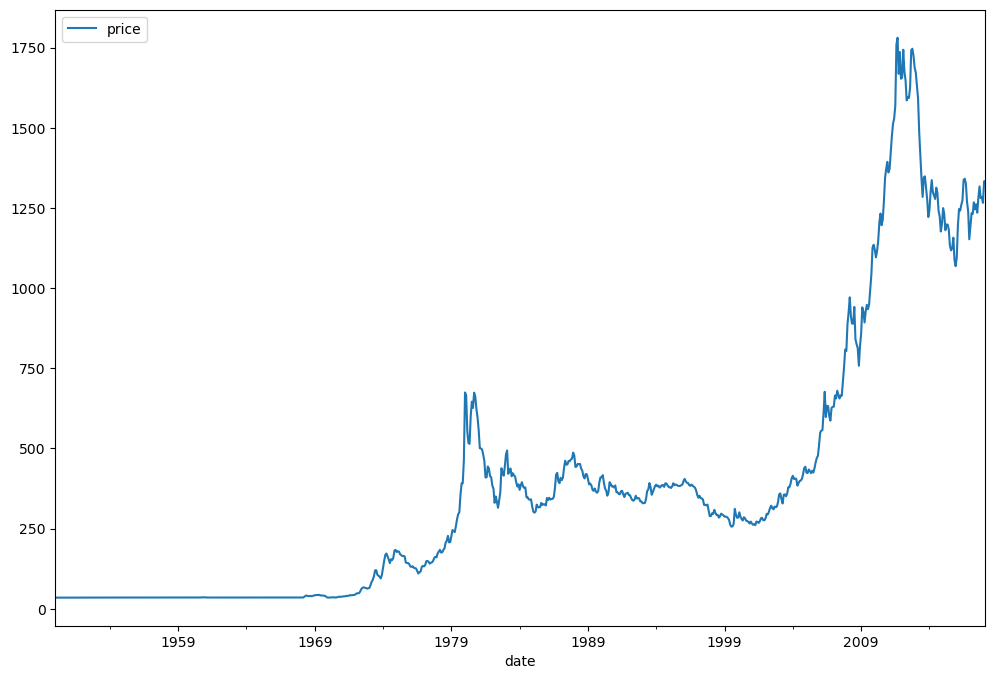

In [26]:
import matplotlib.pyplot as plt
data.plot(figsize=(12,8))

In [27]:
start_date = '2009-01-01'
end_date='2018-01-01'
mask = (data.index >= start_date)&(data.index<end_date)
data=data.loc[mask]

<AxesSubplot:xlabel='date'>

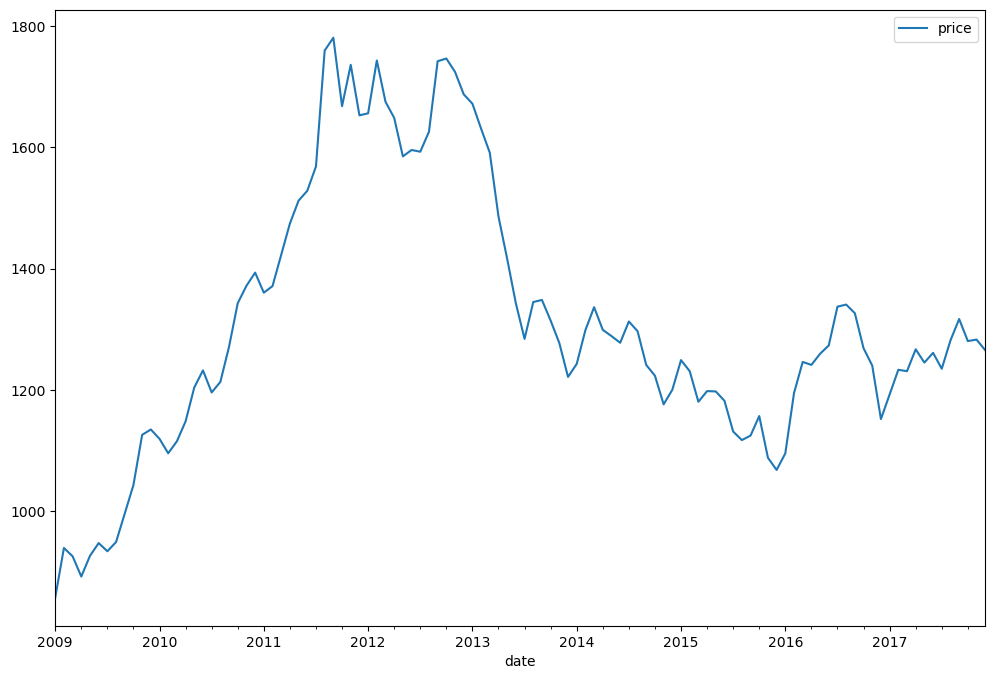

In [28]:
data.index.freq = 'MS'
data.plot(figsize=(12,8))

In [29]:
datayearly = data.rolling(window = 12).mean()

<AxesSubplot:title={'center':'yearly average gold prices'}, xlabel='date'>

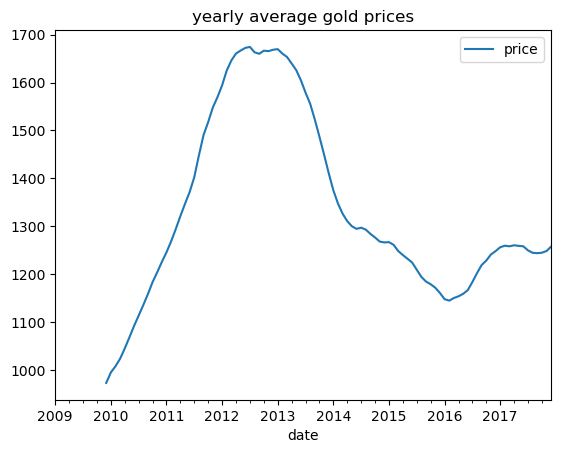

In [30]:
datayearly.plot(title='yearly average gold prices')

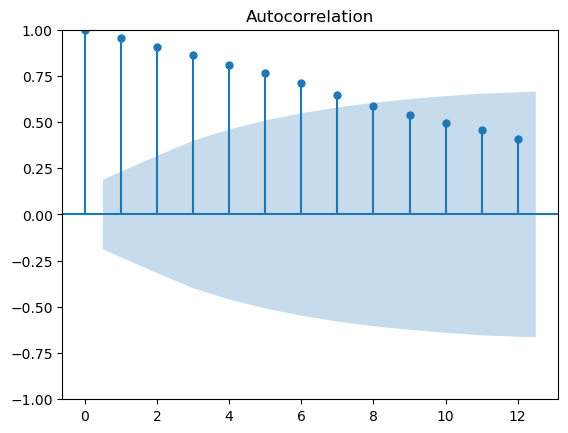

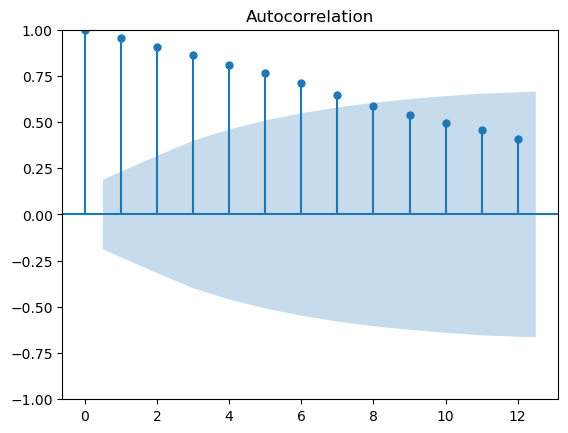

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['price'],lags=12)


/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


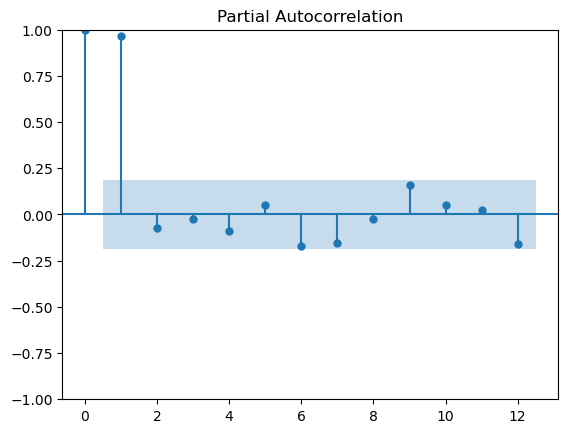

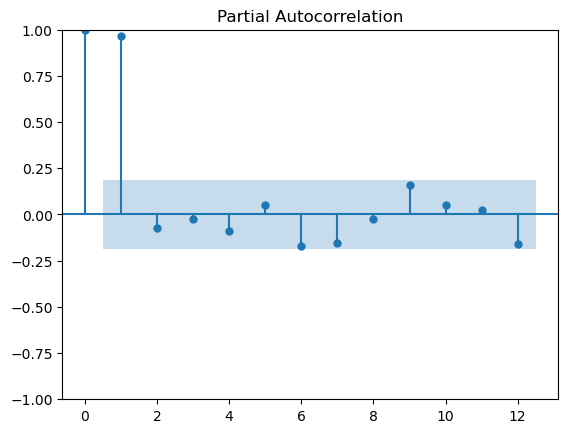

In [32]:
plot_pacf(data['price'],lags=12)

In [33]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series,autolag='AIC')
    labels = ['ADF Test Statistic','p value','#lags used','# observations']
    out = pd.Series(result[0:4],index = labels)
    print(out.to_string())
    if result[1] <= 0.05:
        print('reject the null hypothesis')
        print('data has no unit root and stationary')
    else:
        print('fail to reject the null hypothesis')
        print('data has a unit root and non-stationary')


In [34]:
adf_test(data['price'])

ADF Test Statistic     -2.133761
p value                 0.231158
#lags used              5.000000
# observations        102.000000
fail to reject the null hypothesis
data has a unit root and non-stationary


In [35]:
from pmdarima import  auto_arima

In [37]:
arima_fit = auto_arima(data['price'],start_P=0,start_Q=0,max_Q=10,max_D=10,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1861.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1150.780, Time=0.03 sec


/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return n

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1152.045, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1148.396, Time=0.05 sec


/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return n

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1152.930, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1149.835, Time=0.08 sec


/Users/chenhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1473.891, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1284.360, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1149.225, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.941 seconds


In [38]:
import statsmodels.api as sm
model =sm.tsa.arima.ARIMA(data['price'],order = (1,0,1))

In [39]:
modelresults = model.fit()

In [42]:
fcast = modelresults.predict(start = len(data),end = len(data)+24,typ = ('levels'))
fcast = fcast.rename('ARIMA 1,0,1 Forecast')

<AxesSubplot:xlabel='date'>

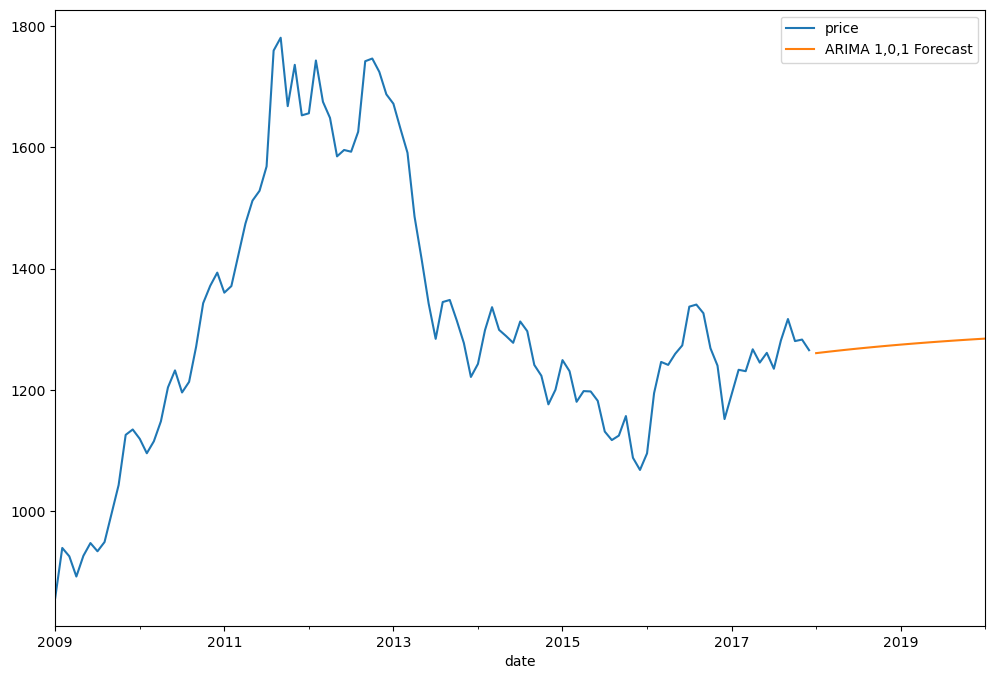

In [43]:
data['price'].plot(figsize=(12,8),legend = True)
fcast.plot(legend=True)